In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import xgboost as xgb
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense, Attention, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset
aapl = '/kaggle/input/apple-stock/AAPL.csv'
df = pd.read_csv(aapl)
data = df.set_index("Date")

In [23]:
data.shape

(2517, 7)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-18,18.749643,18.828215,18.507143,18.522499,16.238518,244944000
2013-11-19,18.536785,18.692142,18.498928,18.555357,16.267321,208938800
2013-11-20,18.543928,18.586430,18.368929,18.392857,16.124859,193916800
2013-11-21,18.485714,18.614643,18.345358,18.612143,16.317110,262026800
2013-11-22,18.554285,18.648571,18.518929,18.564285,16.275150,223725600


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,75.835636,76.673205,75.052609,75.899601,73.935814,1.398182e+08
std,55.111797,55.765060,54.514204,55.169859,55.642110,8.640651e+07
min,17.684999,17.911785,17.626785,17.849285,15.648314,3.145820e+07
25%,29.337500,29.542500,29.100000,29.334999,26.946745,8.298240e+07
50%,47.372501,47.674999,46.902500,47.250000,45.357109,1.139248e+08
75%,132.160004,133.889999,130.630005,132.050003,130.430893,1.703368e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [7]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("Apple Stock price prediction")
    plt.xlabel("Date")
    plt.ylabel("Closing stock prices")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [8]:
train = data[:'2021'].loc[:,:]
test = data['2021':].loc[:,:]

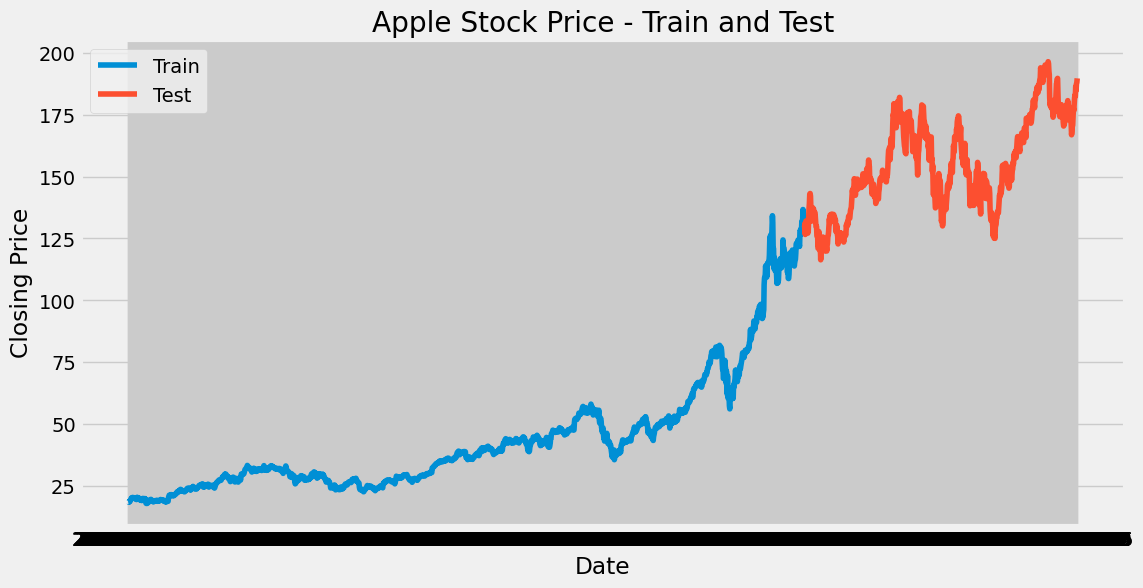

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is the column containing dates and 'Close' is the column containing closing prices
plt.figure(figsize=(12, 6))

# Plotting training data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting testing data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Stock Price - Train and Test')

# Adding legend
plt.legend()

# Show the plot
plt.show()


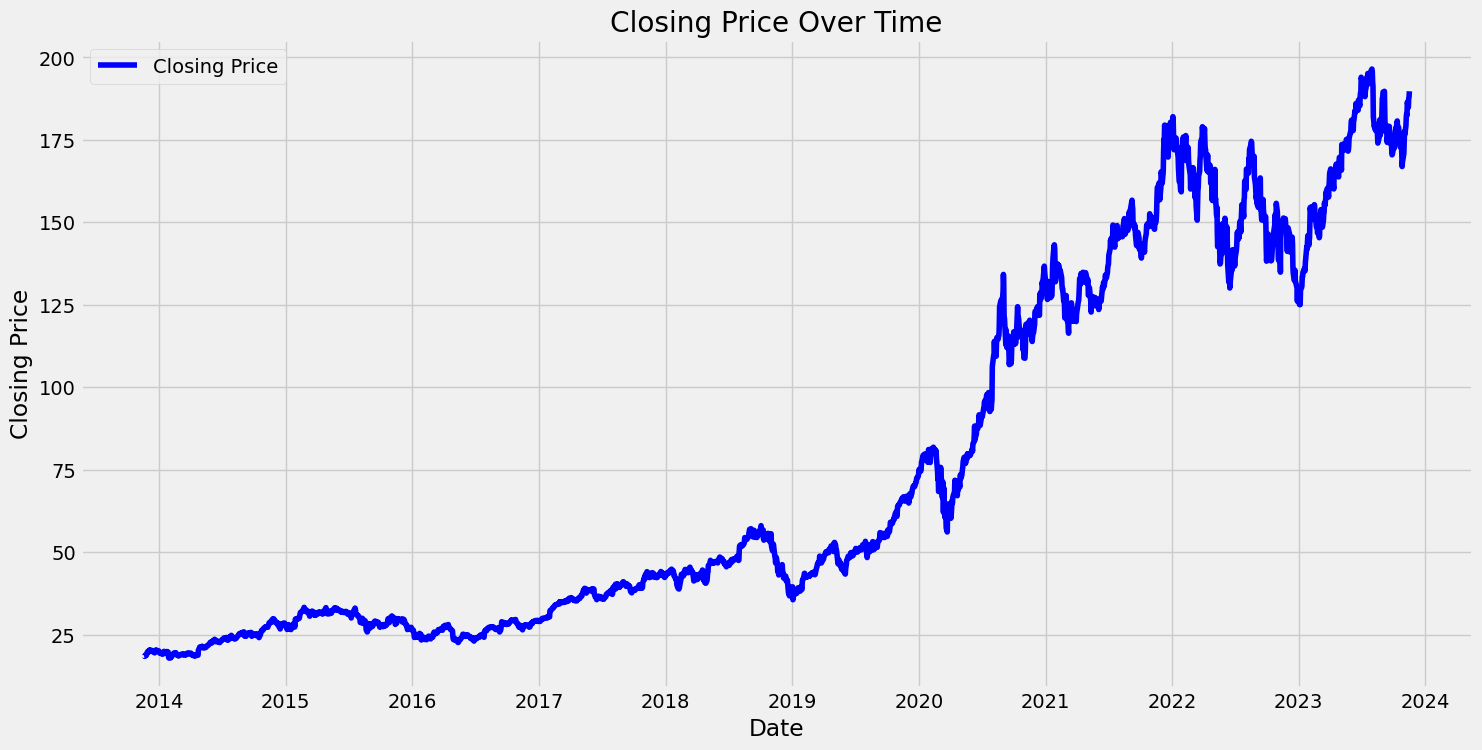

In [10]:
# visualising the closing price history
plt.figure(figsize=(16, 8))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Closing Price', color='blue')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Preprocessing the data
# 1. Removing rows with missing values
data = df.dropna()
print(f"Checking if the shaped of both the data is same or not: {data.shape == df.shape}") 
# Since the shape is same as before we can tell that there are no missing values in the dataset


# 2. Normalising the data
scaler = MinMaxScaler(feature_range=(0, 1))
target_variable_train = train['Close'].values.reshape(-1, 1)
normalised_train = scaler.fit_transform(target_variable_train)
target_variable_test = test['Close'].values.reshape(-1, 1)
normalised_test = scaler.fit_transform(target_variable_test)

Checking if the shaped of both the data is same or not: True


In [12]:
# 3. Creating Sequences
def sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# We will adjust the value of the length of our sequences to facilitate the analysis and generate new sequences using the 'sequences' function.
seq_len = 10
X_train, y_train = sequences(normalised_train, seq_len)
X_test, y_test = sequences(normalised_test, seq_len)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1783, 10, 1), (1783, 1), (714, 10, 1), (714, 1))

In [1]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_pca
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

NameError: name 'PCA' is not defined

In [15]:
# 5. Splitting the data into training, testing, and validation sets

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
# X_train= X_train.drop(['Date','Adj Close'], axis = 1)
# X_train
# X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
# X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
# X_val = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
X_train.shape

(1783, 10, 1)

In [17]:
# 6. Train an XGBoost regressor to determine feature importance

# Flatten 3D arrays
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=10)

# Train the model
xg_reg.fit(X_train_flat, y_train)

# Plot feature importance
feature_importance = xg_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = np.arange(X_train_flat.shape[1])

plt.bar(features, feature_importance[sorted_idx])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


NameError: name 'X_val' is not defined

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


### Model 1: LSTM architecture

In [19]:

# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit to the training set

regressor.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
56/56 [==============================] - 14s 8ms/step - loss: 0.0124
Epoch 2/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 3/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 4/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 5/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0024


23/23 [==============================] - 1s 4ms/step


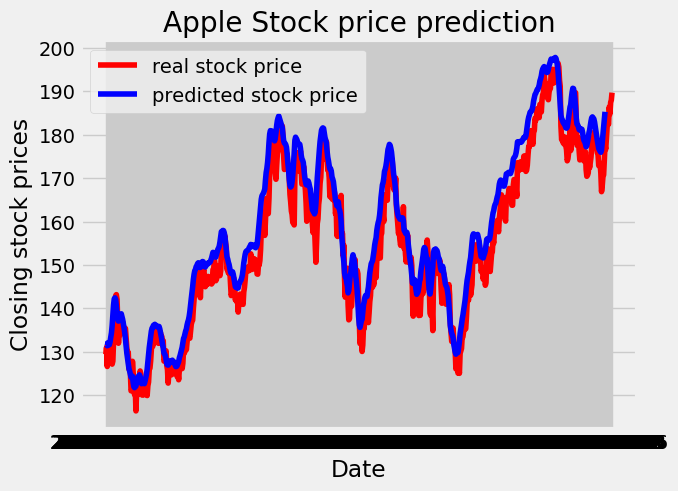

In [20]:
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform(predicted)
plot_predictions(test['Close'], predicted)

In [21]:
# Evaluating the LSTM model by calculating the Root Mean Squeare Error
predict_y_test = scaler.inverse_transform(y_test)
print(f"The root mean square error of LSTM Model is: {math.sqrt(mean_squared_error(predict_y_test, predicted))}")

The root mean square error of LSTM Model is: 7.499071431242281


### Model 2: Gated Recurrent Unit (GRU)

In [ ]:
# The GRU architecture
GRU_model = Sequential()
# First GRU layer with Dropout regularisation
GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
GRU_model.add(Dropout(0.2))
# Second GRU layer
GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
GRU_model.add(Dropout(0.2))
# Third GRU layer
GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
GRU_model.add(Dropout(0.2))
# Fourth GRU layer
GRU_model.add(GRU(units=50, activation='tanh'))
GRU_model.add(Dropout(0.2))
# The output layer
GRU_model.add(Dense(units=1))

# compiling the model

GRU_model.compile(optimizer='adam', loss='mean_squared_error')

# fitting the model

GRU_model.fit(X_train, y_train, epochs=5, batch_size=150)

In [ ]:
predicted_GRU = GRU_model.predict(X_test)
predicted_GRU = scaler.inverse_transform(predicted_GRU)
plot_predictions(test['Close'], predicted_GRU)

In [ ]:
# Evaluating the GRU model by calculating the Root Mean Squeare Error
print(f"The root mean square error of LSTM Model is: {math.sqrt(mean_squared_error(predict_y_test, predicted_GRU))}")

In [ ]:
# # Model 3: Stacked Long Short-Term Memory (LSTM)
# stacked_lstm_model = Sequential()
# stacked_lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# stacked_lstm_model.add(LSTM(50, activation='relu'))
# stacked_lstm_model.add(Dense(1))
# stacked_lstm_model.compile(optimizer='adam', loss='mse')
# train_evaluate_model(stacked_lstm_model, X_train, y_train, X_val, y_val, X_test, y_test, 'Stacked LSTM')


### Model 4: Bidirectional LSTM

In [ ]:
X_train.shape[1]

In [ ]:
bidirectional_lstm_model = Sequential()

#add first bidirectional layer with dropout
bidirectional_lstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bidirectional_lstm_model.add(Dropout(0.2))

bidirectional_lstm_model.add(Dense(units=1))
                             
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
                             
bidirectional_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

In [ ]:
# predicted_bidirectional_lstm = bidirectional_lstm_model.predict(X_test)
# predicted_bidirectional_lstm = scaler.inverse_transform(predicted_bidirectional_lstm)
# plot_predictions(test['Close'], predicted_bidirectional_lstm)

In [ ]:
# print(f"The root mean square error of Bidirectional LSTM Model is: {math.sqrt(mean_squared_error(predict_y_test, predicted_bidirectional_lstm))}")

In [ ]:
# def evaluate_on_validation(model, X_val, y_val, model_name, calculate_metrics=True):
#     # Evaluate on the validation set
#     val_loss = model.evaluate(X_val, y_val)
#     print(f"{model_name} Validation Loss: {val_loss}")

#     if calculate_metrics:
#         # Invert scaling for predictions
#         scaler = MinMaxScaler(feature_range=(0, 1))
#         scaler.fit(y_train.reshape(-1, 1))  # Fit the scaler on the training data
#         y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))
#         y_pred_val = model.predict(X_val)
#         y_pred_val_inverse = scaler.inverse_transform(y_pred_val)

#         # Calculate Mean Squared Error for validation set
#         mse_val = mean_squared_error(y_val_inverse, y_pred_val_inverse)
#         print(f"{model_name} Mean Squared Error (MSE) on Validation Set: {mse_val}")

#         # Calculate Root Mean Squared Error for validation set
#         rmse_val = np.sqrt(mse_val)
#         print(f"{model_name} Root Mean Squared Error (RMSE) on Validation Set: {rmse_val}")

#         # Plot predictions vs actual values for validation set
#         plt.figure(figsize=(10, 6))
#         plt.plot(y_val_inverse, label='Actual')
#         plt.plot(y_pred_val_inverse, label='Predicted')
#         plt.title(f'{model_name} Predictions vs Actual Values on Validation Set')
#         plt.xlabel('Time')
#         plt.ylabel('Stock Price')
#         plt.legend()
#         plt.show()

#         return val_loss, mse_val, rmse_val

#     return val_loss

In [ ]:

# evaluate_on_validation(stacked_lstm_model, X_val, y_val, 'LSTM', calculate_metrics=True)